# Time-mean total Kinetic Energy (KE) at the bottom

This notebook is converted from diag_bot_KE.py, which calculates and plots bottom 500m-averaged time-mean total Kinetic Energy (mTKEb5).

In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import scipy.io

In [2]:
data = nc.Dataset('/short/v45/lxy581/mom6/archive/so_mom6_v33/output028/prog.nc','r')
b5   = nc.Dataset('/short/v45/lxy581/mom6/diag/find_b5.nc','r')

In [3]:
xh = data.variables['xh'][:]
yh = data.variables['yh'][:]
zl = data.variables['zl'][:]
t  = data.variables['Time'][:]

In [4]:
nz = np.size(zl)
nx = np.size(xh)
ny = np.size(yh)
nt = np.size(t)

b5up and b5lo are the indices of the highest and lowerest points within the bottom 500m. 

In [5]:
b5up = b5.variables['b5up'][:,:]
b5lo = b5.variables['b5low'][:,:]

The first dimension of u5, v5, u5t and v5t is the time dimension. Variables u5 and v5 have the first dimension assigned as zeros, in order to be able to be appended with spatial maps of u5t and v5t at different time moments. 

In [6]:
u5 = np.zeros((1,ny,nx))
v5 = np.zeros((1,ny,nx))
u5t = np.full((1,ny,nx),np.nan)
v5t = np.full((1,ny,nx),np.nan)
fac = np.full((nz,ny,nx),np.nan)

fac is a variable of the same dimensions as the velocity field, but values of 1 for the locations you want the mean, and 0 elsewhere.

In [7]:
for j in xrange(ny):
    for i in xrange(nx):
        fac[b5up[j,i]:b5lo[j,i]+1,j,i] = 1.0

In [8]:
for k in xrange(0,nt):
    # print k
    u = data.variables['u'][k,:,:,:]
    v = data.variables['v'][k,:,:,:]

    uu = u*fac
    vv = v*fac

    u5t[0,:,:] = np.nanmean(uu,axis=0)
    v5t[0,:,:] = np.nanmean(vv,axis=0)
 
    u5 = np.append(u5,u5t,0)
    v5 = np.append(v5,v5t,0)   

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72


Remember to discard the first index of the first dimension of u5 and v5 (all zeros assigned earlier to have the correct structure) as they do not contain any meaningful velocity values.

In [9]:
u5 = u5[1:,:,:]
v5 = v5[1:,:,:]

In [10]:
TKEb5   = 0.5*(u5**2 + v5**2)
mTKEb5  = np.nanmean(TKEb5,axis=0)
mTKEb50 = np.log10(mTKEb5)

In [11]:
%matplotlib inline

Note the different colorbar range from the surface KE plot.

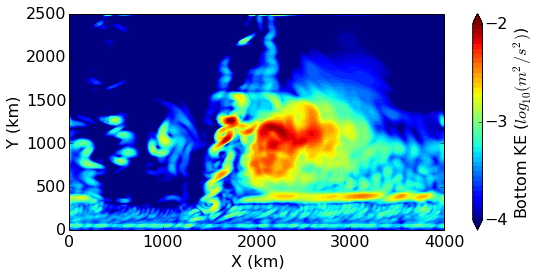

In [12]:
plt.figure(1,figsize=(8,5))

# log - nikurashin and ferrari 2011
kelev = np.arange(-4,-2+0.05,0.05)
ketik = np.arange(-4,-2+1,1)

X,Y=np.meshgrid(xh,yh)

pc = plt.contourf(X,Y,mTKEb50,cmap=plt.cm.jet,levels=kelev,extend='both')
cb = plt.colorbar(pc,ticks=ketik)
plt.gca().set_yticks(np.arange(-1250,1250 + 500,500))
plt.gca().set_yticklabels(['0','500','1000','1500','2000','2500'])
plt.gca().set_xticks(np.arange(-2000,2000 + 1000,1000))
plt.gca().set_xticklabels(['0','1000','2000','3000','4000'])
plt.gca().set_position([0.15,0.2,0.65,0.6])
cb.ax.set_position([0.85,0.2,0.03,0.6])
cb.set_label('Bottom KE ($log_{10}(m^{2}/s^{2})$)',y=0.5,fontsize=16)
cb.ax.tick_params(labelsize=16)
plt.xlabel('X (km)',fontsize=16)
plt.ylabel('Y (km)',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# plt.savefig('/short/v45/lxy581/mom6/diag/v33_b5_mTKE_y50.png',dpi=600)

plt.show()